In [1]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score

In [2]:
# Loading Data
data = pd.read_csv("kc_house_data.csv")
data.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [3]:
data.shape

(21613, 21)

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
# Checking null value
data.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [6]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
id,21613.0,4.580302e+09,2.876566e+09,1.000102e+06,2.123049e+09,3.904930e+09,7.308900e+09,9.900000e+09
price,21613.0,5.400881e+05,3.671272e+05,7.500000e+04,3.219500e+05,4.500000e+05,6.450000e+05,7.700000e+06
bedrooms,21613.0,3.370842e+00,9.300618e-01,0.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,3.300000e+01
bathrooms,21613.0,2.114757e+00,7.701632e-01,0.000000e+00,1.750000e+00,2.250000e+00,2.500000e+00,8.000000e+00
sqft_living,21613.0,2.079900e+03,9.184409e+02,2.900000e+02,1.427000e+03,1.910000e+03,2.550000e+03,1.354000e+04
sqft_lot,21613.0,1.510697e+04,4.142051e+04,5.200000e+02,5.040000e+03,7.618000e+03,1.068800e+04,1.651359e+06
floors,21613.0,1.494309e+00,5.399889e-01,1.000000e+00,1.000000e+00,1.500000e+00,2.000000e+00,3.500000e+00
waterfront,21613.0,7.541757e-03,8.651720e-02,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00
view,21613.0,2.343034e-01,7.663176e-01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00
condition,21613.0,3.409430e+00,6.507430e-01,1.000000e+00,3.000000e+00,3.000000e+00,4.000000e+00,5.000000e+00


In [7]:
# droping id column
data.drop("id", axis=1, inplace=True)

In [8]:
# droping zipcode column
data.drop("zipcode", axis=1, inplace=True)

In [9]:
# changing date column from object to datetime
data["date"] = pd.to_datetime(data["date"])

In [10]:
data["year"] = data["date"].dt.year
data["month"] = data["date"].dt.month

In [11]:
data.head()

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,...,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
0,2014-10-13,221900.0,3,1.00,1180,5650,1.0,0,0,3,...,1180,0,1955,0,47.5112,-122.257,1340,5650,2014,10
1,2014-12-09,538000.0,3,2.25,2570,7242,2.0,0,0,3,...,2170,400,1951,1991,47.7210,-122.319,1690,7639,2014,12
2,2015-02-25,180000.0,2,1.00,770,10000,1.0,0,0,3,...,770,0,1933,0,47.7379,-122.233,2720,8062,2015,2
3,2014-12-09,604000.0,4,3.00,1960,5000,1.0,0,0,5,...,1050,910,1965,0,47.5208,-122.393,1360,5000,2014,12
4,2015-02-18,510000.0,3,2.00,1680,8080,1.0,0,0,3,...,1680,0,1987,0,47.6168,-122.045,1800,7503,2015,2


# EDA

In [12]:
data.corr()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,lat,long,sqft_living15,sqft_lot15,year,month
price,1.000000,0.308350,0.525138,0.702035,0.089661,0.256794,0.266369,0.397293,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,0.307003,0.021626,0.585379,0.082447,0.003576,-0.010081
bedrooms,0.308350,1.000000,0.515884,0.576671,0.031703,0.175429,-0.006582,0.079532,0.028472,0.356967,0.477600,0.303093,0.154178,0.018841,-0.008931,0.129473,0.391638,0.029244,-0.009838,-0.001533
bathrooms,0.525138,0.515884,1.000000,0.754665,0.087740,0.500653,0.063744,0.187737,-0.124982,0.664983,0.685342,0.283770,0.506019,0.050739,0.024573,0.223042,0.568634,0.087175,-0.026596,0.007392
sqft_living,0.702035,0.576671,0.754665,1.000000,0.172826,0.353949,0.103818,0.284611,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,0.052529,0.240223,0.756420,0.183286,-0.029038,0.011810
sqft_lot,0.089661,0.031703,0.087740,0.172826,1.000000,-0.005201,0.021604,0.074710,-0.008958,0.113621,0.183512,0.015286,0.053080,0.007644,-0.085683,0.229521,0.144608,0.718557,0.005468,-0.002369
floors,0.256794,0.175429,0.500653,0.353949,-0.005201,1.000000,0.023698,0.029444,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,0.049614,0.125419,0.279885,-0.011269,-0.022315,0.014005
waterfront,0.266369,-0.006582,0.063744,0.103818,0.021604,0.023698,1.000000,0.401857,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,-0.014274,-0.041910,0.086463,0.030703,-0.004165,0.008132
view,0.397293,0.079532,0.187737,0.284611,0.074710,0.029444,0.401857,1.000000,0.045990,0.251321,0.167649,0.276947,-0.053440,0.103917,0.006157,-0.078400,0.280439,0.072575,0.001364,-0.005638
condition,0.036362,0.028472,-0.124982,-0.058753,-0.008958,-0.263768,0.016653,0.045990,1.000000,-0.144674,-0.158214,0.174105,-0.361417,-0.060618,-0.014941,-0.106500,-0.092824,-0.003406,-0.045589,0.021978
grade,0.667434,0.356967,0.664983,0.762704,0.113621,0.458183,0.082775,0.251321,-0.144674,1.000000,0.755923,0.168392,0.446963,0.014414,0.114084,0.198372,0.713202,0.119248,-0.030387,0.008376


<AxesSubplot: >

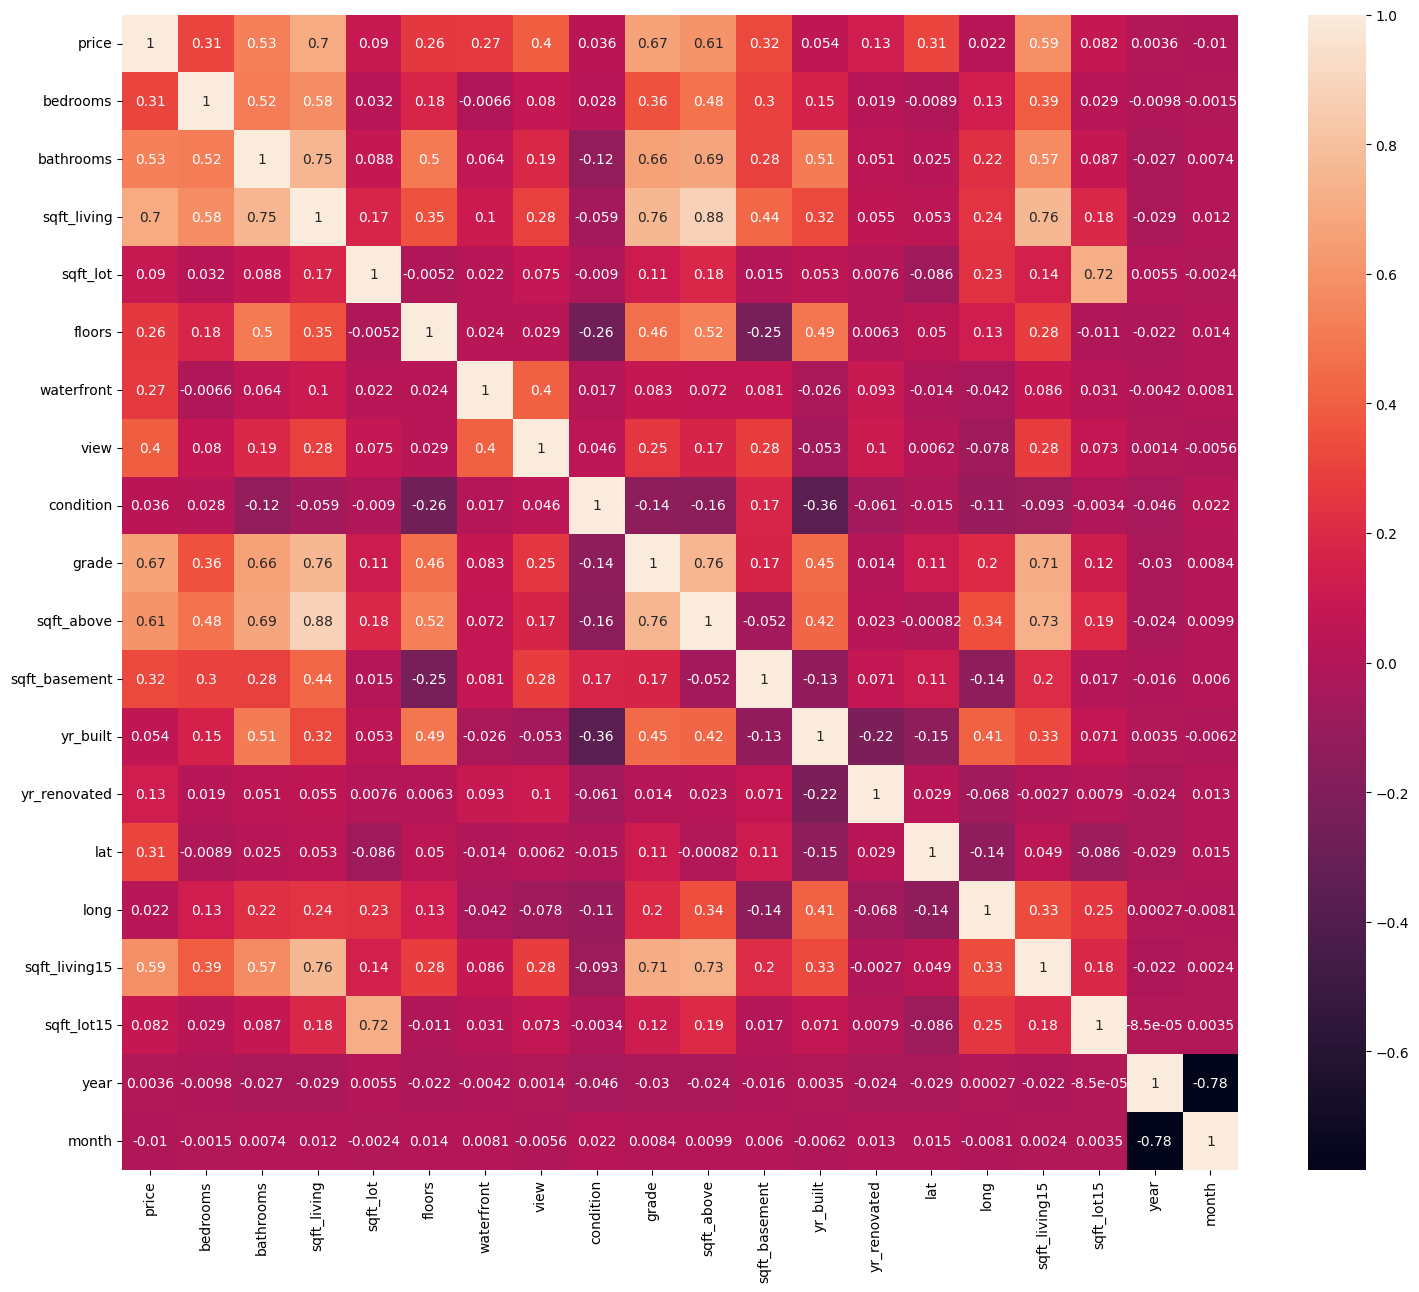

In [13]:
plt.figure(figsize=(18,15))
sns.heatmap(data.corr(), annot=True)

<AxesSubplot: xlabel='bedrooms', ylabel='price'>

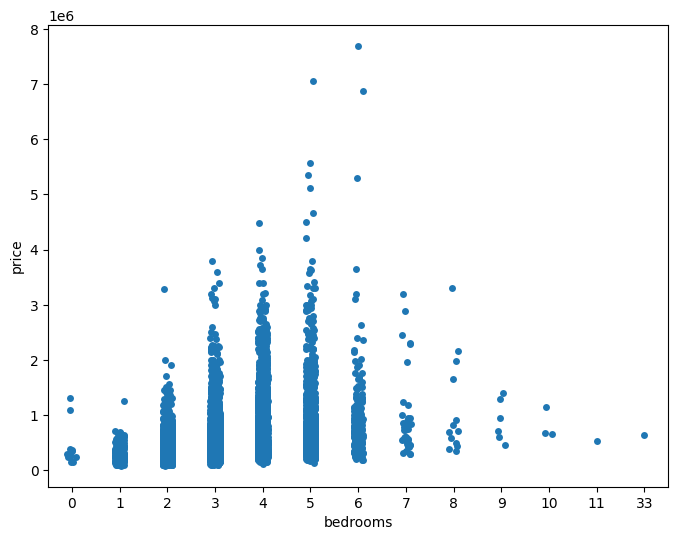

In [14]:
# price VS bedroom
plt.figure(figsize=(8,6))
sns.stripplot(data=data, x = "bedrooms", y = "price")

<AxesSubplot: xlabel='bathrooms', ylabel='price'>

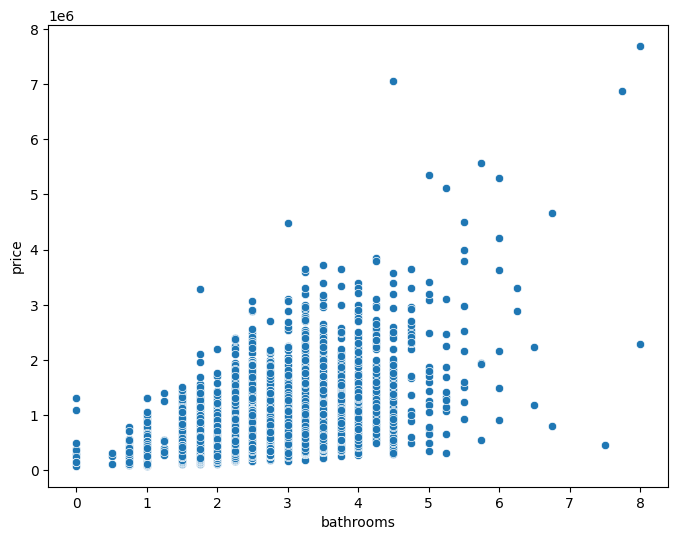

In [15]:
# Price VS bathrooms
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x = "bathrooms", y = "price")

<AxesSubplot: xlabel='price', ylabel='sqft_living'>

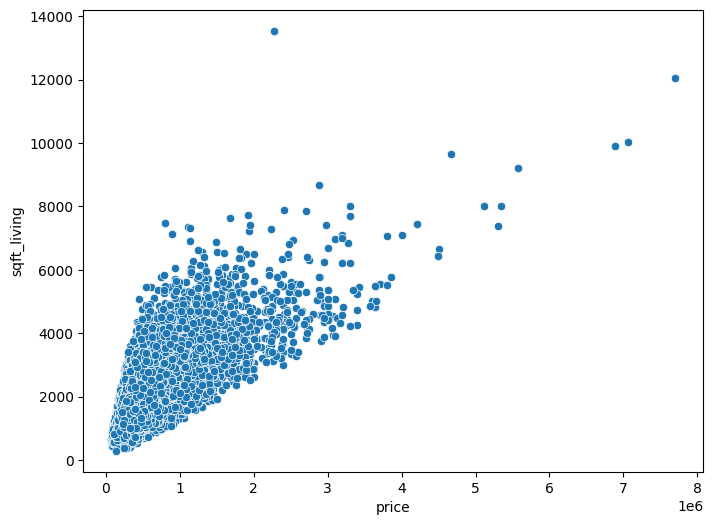

In [16]:
# House squarefoot vs price
plt.figure(figsize = (8,6))
sns.scatterplot(data=data, x = 'price',y = 'sqft_living')

<AxesSubplot: xlabel='grade', ylabel='price'>

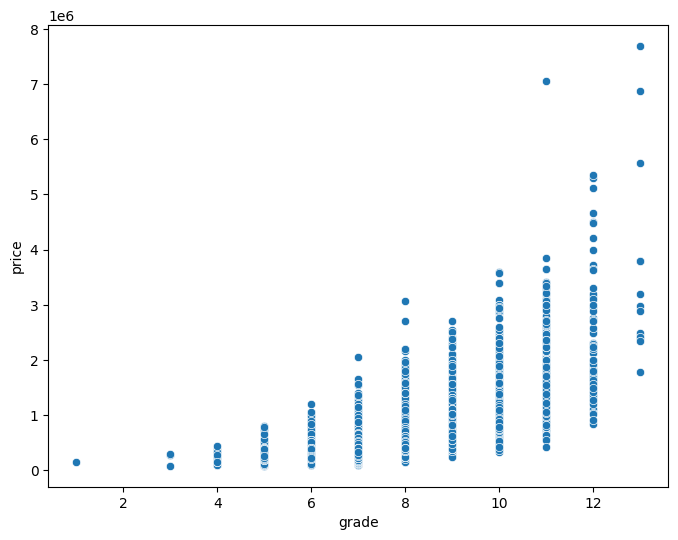

In [17]:
# Grade VS Price
plt.figure(figsize=(8,6))
sns.scatterplot(data=data, x = "grade", y = "price")

<AxesSubplot: xlabel='date', ylabel='Count'>

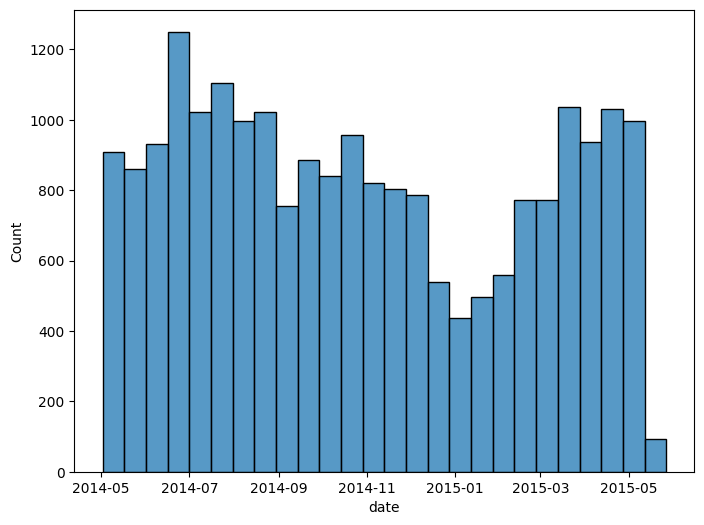

In [18]:
# most house sold per year
plt.figure(figsize=(8,6))
sns.histplot(data["date"])

<AxesSubplot: xlabel='month', ylabel='Count'>

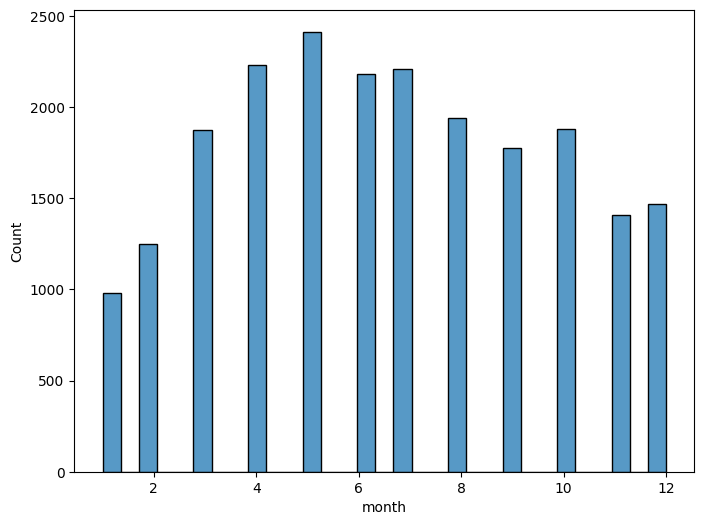

In [19]:
# most house sold per month
plt.figure(figsize=(8,6))
sns.histplot(data["month"])

<AxesSubplot: xlabel='condition', ylabel='price'>

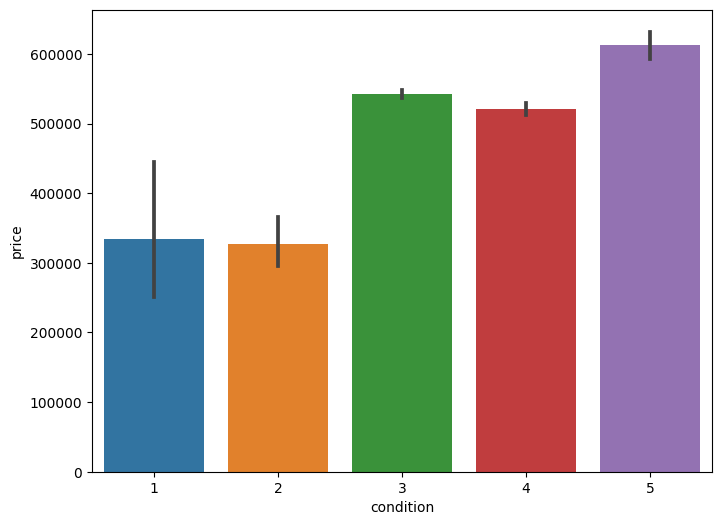

In [20]:
# House Condition vs price
plt.figure(figsize=(8,6))
sns.barplot(data=data, x = "condition", y = "price")

<AxesSubplot: xlabel='long', ylabel='lat'>

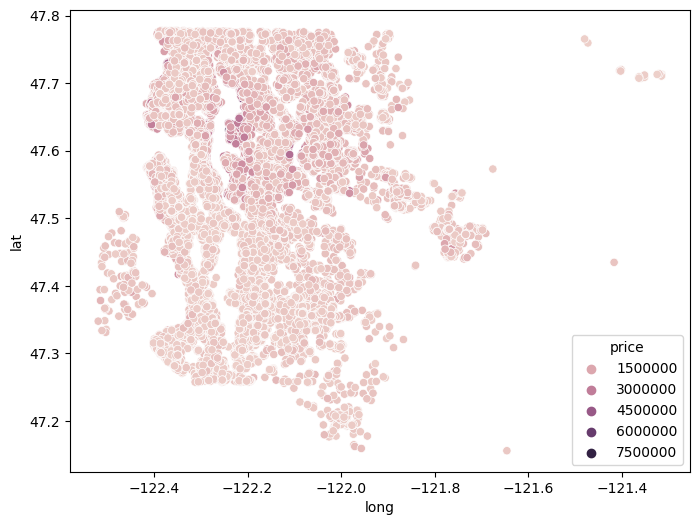

In [21]:
plt.figure(figsize  =(8,6))
sns.scatterplot(data=data, x = 'long', y = 'lat', hue="price")

we can see that its match with actual map of king county(https://www.kcha.org/housing/map)

# Modelling

In [22]:
# droping date column
data.drop("date", axis=1, inplace=True)

In [23]:
# splitting and training data
X = data.drop("price", axis=1)
y = data["price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [24]:
# Standard Scaler
scale = StandardScaler()

X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [25]:
# Fitting Model
random_model = RandomForestRegressor()
random_model.fit(X_train,y_train)

RandomForestRegressor()

In [26]:
# Model Prediction
pred = random_model.predict(X_test)

In [27]:
print(f'r2 score: {mean_absolute_error(y_test, pred)}')
print(f'Mean Squared Error: {mean_squared_error(y_test, pred)}')
print(f'r2 score: {round(r2_score(y_test, pred)*100)}%')

r2 score: 73053.00070784178
Mean Squared Error: 21813118973.244038
r2 score: 86%


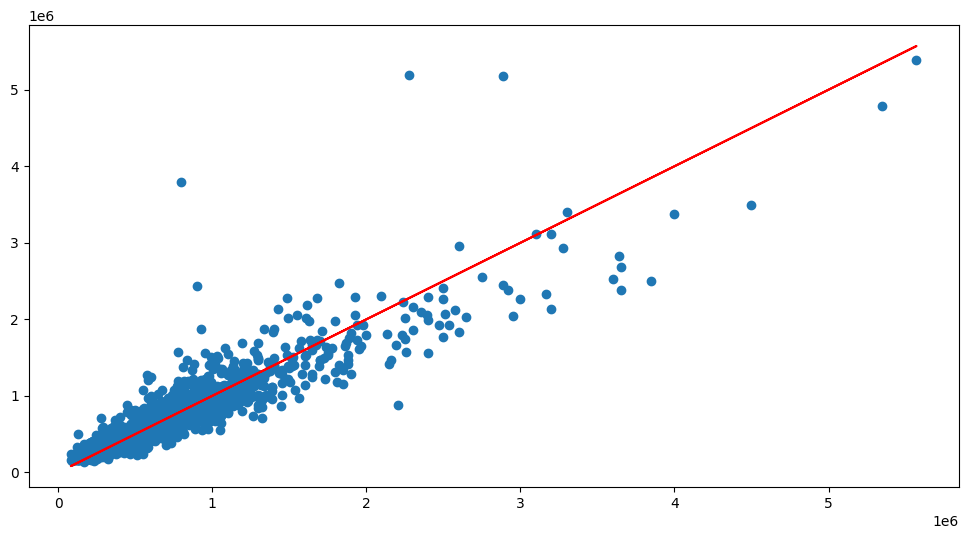

In [28]:
# Our predictions
plt.figure(figsize = (12,6))
plt.scatter(y_test,pred)

# Perfect predictions
plt.plot(y_test,y_test,'r')

In [115]:
# lets Check residuals
residuals = y_test-pred
residuals

735      -18654.50
2830       2808.50
4106     -39769.80
16218   -530010.50
19964      2134.41
           ...    
13674      8899.20
20377    -26638.00
8805      -2120.69
10168     37536.21
2522      15176.52
Name: price, Length: 4323, dtype: float64

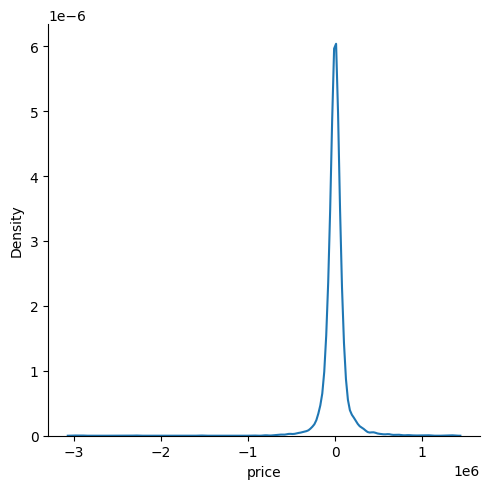

In [116]:
# plotting Residuals
sns.displot(residuals, kind="kde")

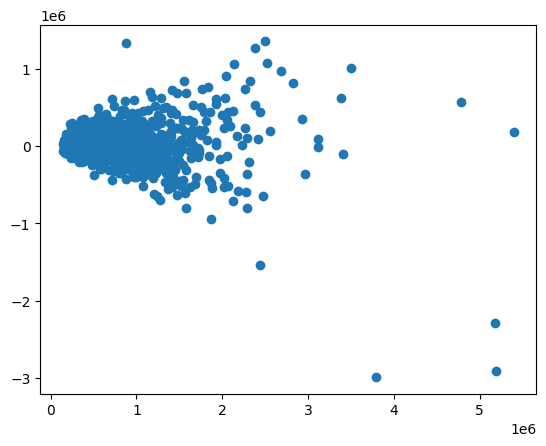

In [117]:
# Scatter plot with respect to prediction and residuals
plt.scatter(pred, residuals)

In [106]:
# check feature importance 
random_model.feature_importances_

array([0.00285745, 0.01172881, 0.25820813, 0.01401367, 0.00187041,
       0.0301233 , 0.00995545, 0.00293048, 0.33227657, 0.01930671,
       0.00599992, 0.0343058 , 0.00195013, 0.15330556, 0.066866  ,
       0.03295939, 0.01380886, 0.00130068, 0.00623267])

In [107]:
# Function for plotting feature importance of our Model
def plot_features(columns, importances, n=20):
    df = (pd.DataFrame({"features": columns,
                        "feature_importances": importances})
         .sort_values("feature_importances", ascending=False)
         .reset_index(drop=True))
    
    plt.subplots(figsize=(12,6))
    sns.barplot(data=df,y = df["features"][:n],x = df["feature_importances"][:20])
    plt.ylabel("Features")
    plt.xlabel("Feature importance")

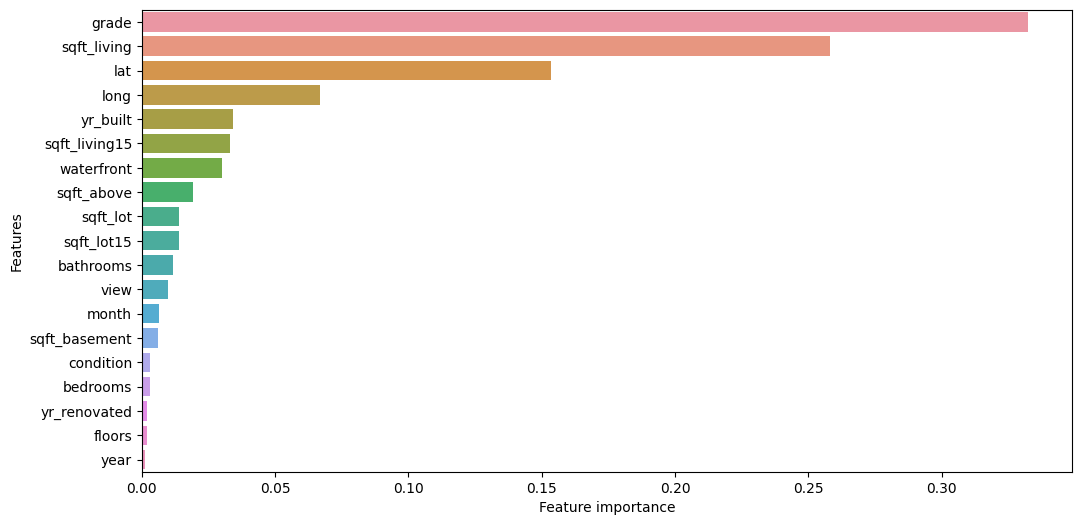

In [108]:
# Using above function and plotting feature importance 
plot_features(X.columns, random_model.feature_importances_)

In [68]:
# Using Example for real price prediction
predict_price = data.drop("price", axis=1).iloc[0]
predict_price

bedrooms            3.0000
bathrooms           1.0000
sqft_living      1180.0000
sqft_lot         5650.0000
floors              1.0000
waterfront          0.0000
view                0.0000
condition           3.0000
grade               7.0000
sqft_above       1180.0000
sqft_basement       0.0000
yr_built         1955.0000
yr_renovated        0.0000
lat                47.5112
long             -122.2570
sqft_living15    1340.0000
sqft_lot15       5650.0000
year             2014.0000
month              10.0000
Name: 0, dtype: float64

In [70]:
# model is trained on scaled versions of the features so we can convert this value into scaled values
predict_price = scale.transform(predict_price.values.reshape(1,-1))
predict_price

array([[-0.39526335, -1.45258323, -0.985256  , -0.23556614, -0.91959976,
        -0.08499166, -0.30591651, -0.62542567, -0.55868959, -0.73753689,
        -0.65631017, -0.54725545, -0.20829394, -0.35491059, -0.30507313,
        -0.94376477, -0.25704623, -0.68884041,  1.09859931]])

In [71]:
# Predict Price 
random_model.predict(predict_price)

array([229546.])

In [72]:
# Checking True Price
data.iloc[0]

price            221900.0000
bedrooms              3.0000
bathrooms             1.0000
sqft_living        1180.0000
sqft_lot           5650.0000
floors                1.0000
waterfront            0.0000
view                  0.0000
condition             3.0000
grade                 7.0000
sqft_above         1180.0000
sqft_basement         0.0000
yr_built           1955.0000
yr_renovated          0.0000
lat                  47.5112
long               -122.2570
sqft_living15      1340.0000
sqft_lot15         5650.0000
year               2014.0000
month                10.0000
Name: 0, dtype: float64